In [1]:
import json
import pandas as pd

from NewsBiasClustering import NewsBiasClusteringFromMetrics

In [2]:
print('Loading File')
file = open('rust-articles-backup-metrics.json', encoding='utf8')
articles = pd.DataFrame.from_dict(json.load(file))
print('File Loaded')

Loading File
File Loaded


metro
Counter({0: 8816, 1: 6673})
[['very high sentiment'], ['very low sentiment']]


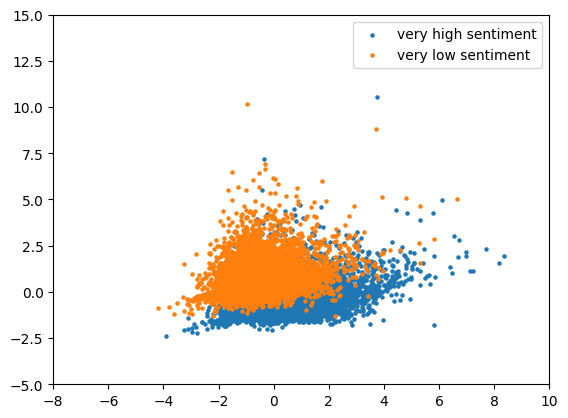

sky
Counter({0: 1711, 2: 1498, 1: 1202, 6: 905, 3: 277, 5: 241, 4: 151})
[['very low sentiment'], ['very high sentiment', 'medium quoteBased', 'very low spin', 'low informal'], ['very high sentiment'], ['very low spin'], ['very high sentiment', 'very low sensationalized', 'low mudslinging', 'very low spin', 'very low informal'], ['very low quoteBased', 'very low spin'], ['very low sentiment', 'medium quoteBased', 'very low sensationalized', 'low informal']]


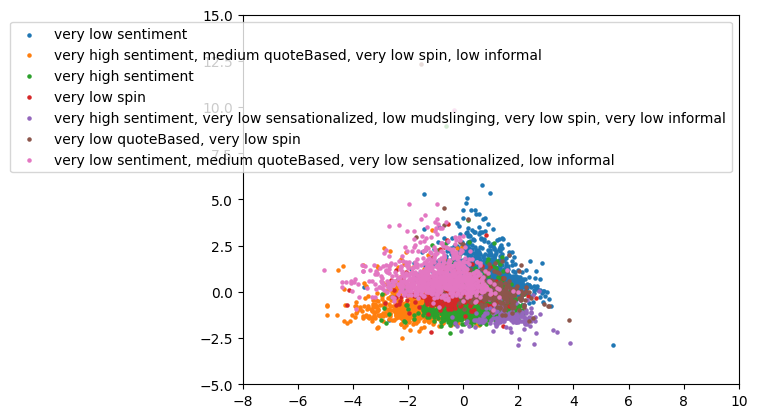

theguardian
Counter({1: 7904, 0: 6691})
[['very low sentiment'], ['very high sentiment']]


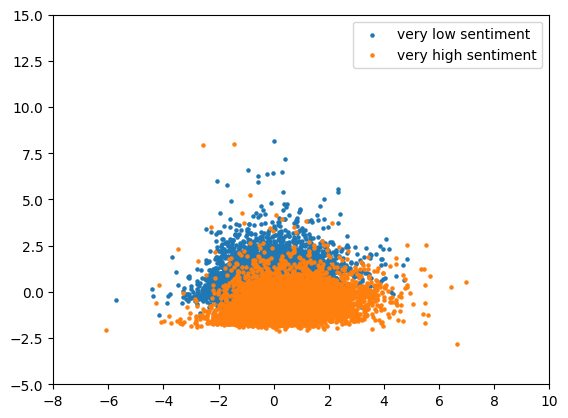

sun
Counter({4: 7176, 0: 6736, 3: 6340, 5: 6005, 1: 5589, 2: 618})
[['very low quoteBased', 'very low spin'], ['very low sentiment', 'very low sensationalized', 'very low mudslinging'], ['very low quoteBased', 'very low sensationalized', 'very low mudslinging', 'very low spin', 'medium informal'], ['very high sentiment'], ['medium quoteBased'], ['very low sentiment', 'medium quoteBased', 'very low sensationalized', 'very low mudslinging']]


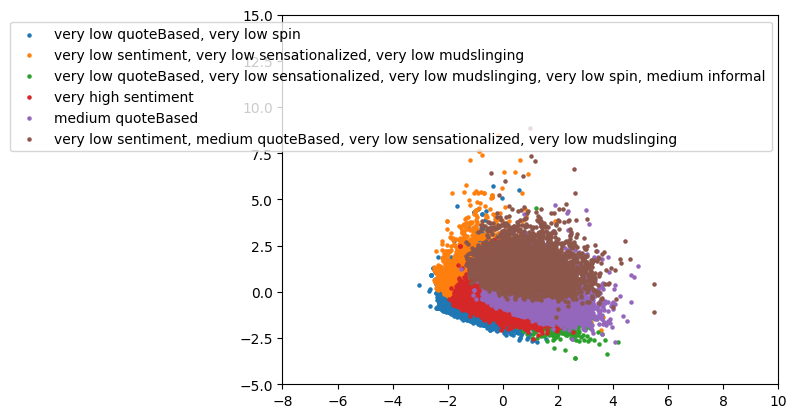

bbc
Counter({0: 5760, 1: 5158})
[['very high sentiment'], ['very low sentiment']]


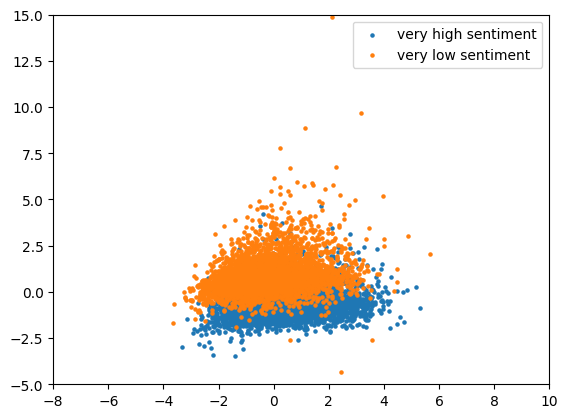

dailymail
Counter({1: 27490, 0: 24841})
[['very high sentiment'], ['very low sentiment']]


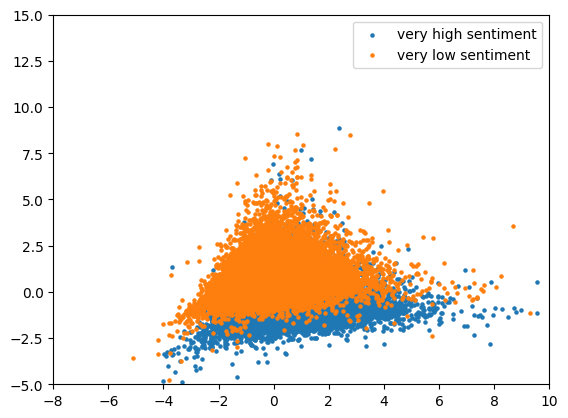

mirror
Counter({0: 6399, 1: 4133, 2: 2351, 3: 988, 4: 1})
[['very high sentiment', 'very low spin'], ['very low quoteBased', 'low informal'], ['very low sentiment'], ['very low spin', 'low informal'], ['very high quoteBased', 'very low sensationalized', 'high mudslinging', 'very low spin', 'low informal']]


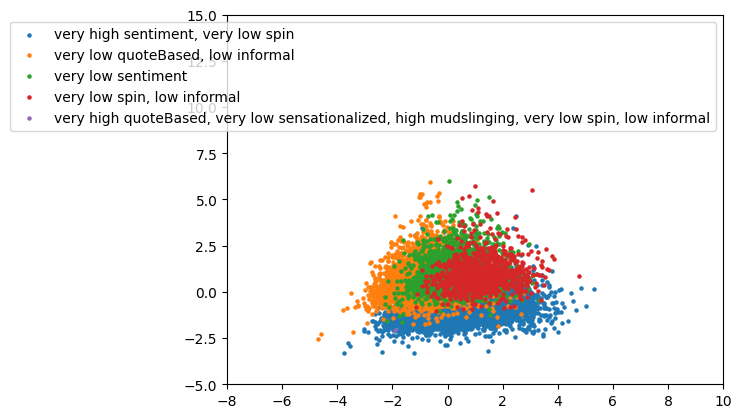

independent
Counter({1: 9008, 0: 6563})
[['very high sentiment'], ['very low sentiment']]


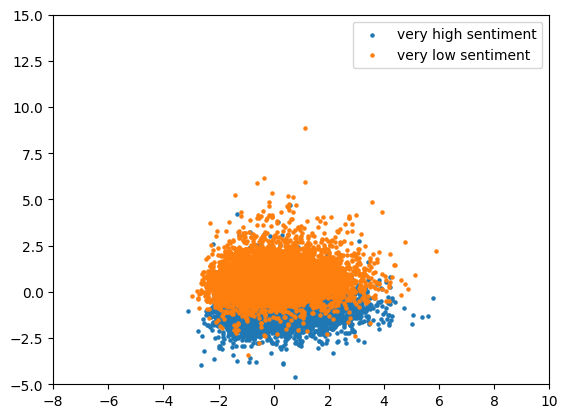

In [3]:
fullArticles = pd.DataFrame()
fullDominantMetrics = pd.DataFrame()
for publisher in list(set(articles['publisher'])):
    print(publisher)
    publisherArticles = articles[articles['publisher'] == publisher].reset_index(drop=True)
    metrics = []
    for i in range(len(publisherArticles)):
        sentiment = publisherArticles.iloc[i]['sentiment']
        quoteBased = publisherArticles.iloc[i]['quoteBased']
        sensationalized = publisherArticles.iloc[i]['sensationalized']
        mudslinging = publisherArticles.iloc[i]['mudslinging']
        spin = publisherArticles.iloc[i]['spin']
        informal = publisherArticles.iloc[i]['informal']
        metrics.append([sentiment, quoteBased, sensationalized, mudslinging, spin, informal])
    labels, dataPCA, dominantMetrics = NewsBiasClusteringFromMetrics(metrics)
    publisherArticles['publisherPC1'] = dataPCA['PC1']
    publisherArticles['PublisherPC2'] = dataPCA['PC2']
    publisherArticles['publisherLabel'] = labels
    fullArticles = pd.concat([fullArticles, publisherArticles])
    dominantMetrics['publisher'] = publisher
    fullDominantMetrics = pd.concat([fullDominantMetrics, dominantMetrics])
fullArticles = fullArticles.reset_index(drop=True)

In [4]:
fullDominantMetrics

,label,dominantMetrics,dominantMetricsWords,publisher
0,0,"[[sentiment, 0.9]]",[very high sentiment],metro
1,1,"[[sentiment, 0.1]]",[very low sentiment],metro
0,0,"[[sentiment, 0.0]]",[very low sentiment],sky
1,1,"[[sentiment, 1.0], [quoteBased, 0.5], [spin, 0...","[very high sentiment, medium quoteBased, very ...",sky
2,2,"[[sentiment, 1.0]]",[very high sentiment],sky
3,3,"[[spin, 0.1]]",[very low spin],sky
4,4,"[[sentiment, 0.9], [sensationalized, 0.0], [mu...","[very high sentiment, very low sensationalized...",sky
5,5,"[[quoteBased, 0.1], [spin, 0.1]]","[very low quoteBased, very low spin]",sky
6,6,"[[sentiment, 0.0], [quoteBased, 0.5], [sensati...","[very low sentiment, medium quoteBased, very l...",sky
0,0,"[[sentiment, 0.1]]",[very low sentiment],theguardian


Counter({0: 84064, 1: 77161})
[['very high sentiment'], ['very low sentiment']]


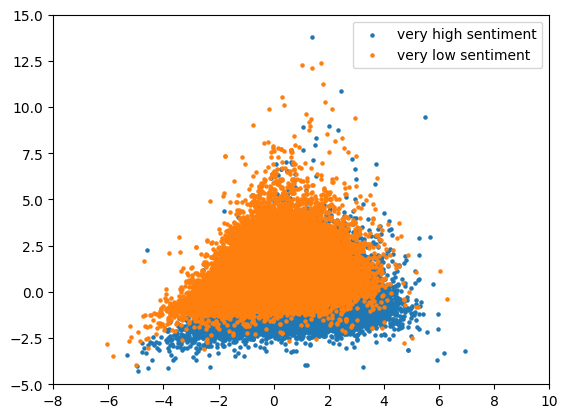

In [5]:
metrics = []
for i in range(len(fullArticles)):
    sentiment = fullArticles.iloc[i]['sentiment']
    quoteBased = fullArticles.iloc[i]['quoteBased']
    sensationalized = fullArticles.iloc[i]['sensationalized']
    mudslinging = fullArticles.iloc[i]['mudslinging']
    spin = fullArticles.iloc[i]['spin']
    informal = fullArticles.iloc[i]['informal']
    metrics.append([sentiment, quoteBased, sensationalized, mudslinging, spin, informal])
labels, dataPCA, dominantMetrics = NewsBiasClusteringFromMetrics(metrics)
fullArticles['fullPC1'] = dataPCA['PC1']
fullArticles['fullPC2'] = dataPCA['PC2']
fullArticles['fullLabel'] = labels
dominantMetrics['publisher'] = 'all'
fullDominantMetrics = pd.concat([fullDominantMetrics,dominantMetrics])
fullDominantMetrics = fullDominantMetrics.reset_index(drop=True)

In [6]:
"""fullArticles.to_json('rust-articles-full.json')
fullDominantMetrics.to_json('rust-articles-full-dominant-metrics.json')
fullArticles[:5].to_json('rust-articles-full-small.json')"""
fullDominantMetrics

,label,dominantMetrics,dominantMetricsWords,publisher
0,0,"[[sentiment, 0.9]]",[very high sentiment],metro
1,1,"[[sentiment, 0.1]]",[very low sentiment],metro
2,0,"[[sentiment, 0.0]]",[very low sentiment],sky
3,1,"[[sentiment, 1.0], [quoteBased, 0.5], [spin, 0...","[very high sentiment, medium quoteBased, very ...",sky
4,2,"[[sentiment, 1.0]]",[very high sentiment],sky
5,3,"[[spin, 0.1]]",[very low spin],sky
6,4,"[[sentiment, 0.9], [sensationalized, 0.0], [mu...","[very high sentiment, very low sensationalized...",sky
7,5,"[[quoteBased, 0.1], [spin, 0.1]]","[very low quoteBased, very low spin]",sky
8,6,"[[sentiment, 0.0], [quoteBased, 0.5], [sensati...","[very low sentiment, medium quoteBased, very l...",sky
9,0,"[[sentiment, 0.1]]",[very low sentiment],theguardian


In [7]:
data = []
for i in range(len(set(fullArticles.fullLabel))):
    labelPCs = []
    labelData = fullArticles[fullArticles.fullLabel == i].reset_index(drop=True)
    for j in range(len(labelData)):
        labelPCs.append({
            "x": labelData.iloc[j]['fullPC1'],
            "y": labelData.iloc[j]['fullPC2']
        })
    data.append(labelPCs)

dataSmall = []
smallArticles = fullArticles[:10]
for i in range(len(set(smallArticles.fullLabel))):
    labelPCs = []
    labelData = smallArticles[smallArticles.fullLabel == i].reset_index(drop=True)
    for j in range(len(labelData)):
        labelPCs.append({
            "x": labelData.iloc[j]['fullPC1'],
            "y": labelData.iloc[j]['fullPC2']
        })
    dataSmall.append(labelPCs)

In [8]:
"""with open("full.json", "w") as f:
   json.dump(data, f)

with open("full-small.json", "w") as f:
   json.dump(dataSmall, f)"""

'with open("full.json", "w") as f:\n   json.dump(data, f)\n\nwith open("full-small.json", "w") as f:\n   json.dump(dataSmall, f)'

In [9]:
fullDominantMetrics

,label,dominantMetrics,dominantMetricsWords,publisher
0,0,"[[sentiment, 0.9]]",[very high sentiment],metro
1,1,"[[sentiment, 0.1]]",[very low sentiment],metro
2,0,"[[sentiment, 0.0]]",[very low sentiment],sky
3,1,"[[sentiment, 1.0], [quoteBased, 0.5], [spin, 0...","[very high sentiment, medium quoteBased, very ...",sky
4,2,"[[sentiment, 1.0]]",[very high sentiment],sky
5,3,"[[spin, 0.1]]",[very low spin],sky
6,4,"[[sentiment, 0.9], [sensationalized, 0.0], [mu...","[very high sentiment, very low sensationalized...",sky
7,5,"[[quoteBased, 0.1], [spin, 0.1]]","[very low quoteBased, very low spin]",sky
8,6,"[[sentiment, 0.0], [quoteBased, 0.5], [sensati...","[very low sentiment, medium quoteBased, very l...",sky
9,0,"[[sentiment, 0.1]]",[very low sentiment],theguardian
